In [1]:
import pickle
import os
import numpy as np

sampling_rate = [10, 20, 30, 60, 120]

with open(f"rdp_result\\result_my_5.pickle",'rb') as f: 
    rdp_my_data = pickle.load(f) # trendHMM
    
with open(f"rdp_result\\result_org_5.pickle",'rb') as f:
    rdp_org_data = pickle.load(f) # HMM
    
with open(f"non_rdp_result\\result_my_5.pickle",'rb') as f: 
    non_rdp_my_data = pickle.load(f) # trendHMM
    
with open(f"non_rdp_result\\result_org_5.pickle",'rb') as f:
    non_rdp_org_data = pickle.load(f) # HMM
    

In [ ]:
# window size = 5로 고정해놓고 우선 테스트.

In [66]:
# trendHMM과 HMM의 sampling rate별 비교 on window_size=5
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

rdp_my_rmf_values = [0 for _ in range(len(sampling_rate))]
rdp_org_rmf_values = [0 for _ in range(len(sampling_rate))]
non_rdp_my_rmf_values = [0 for _ in range(len(sampling_rate))]
non_rdp_org_rmf_values = [0 for _ in range(len(sampling_rate))]

for i in range(len(sampling_rate)):
    for j in range(len(my_data)):
            rdp_my_rmf_values[i] += rdp_my_data[j][i]
            rdp_org_rmf_values[i] += rdp_org_data[j][i]
            non_rdp_my_rmf_values[i] += non_rdp_my_data[j][i]
            non_rdp_org_rmf_values[i] += non_rdp_org_data[j][i]
    
    rdp_my_rmf_values[i] = rdp_my_rmf_values[i]/100
    rdp_org_rmf_values[i] = rdp_org_rmf_values[i]/100
    non_rdp_my_rmf_values[i] = non_rdp_my_rmf_values[i]/100
    non_rdp_org_rmf_values[i] = non_rdp_org_rmf_values[i]/100

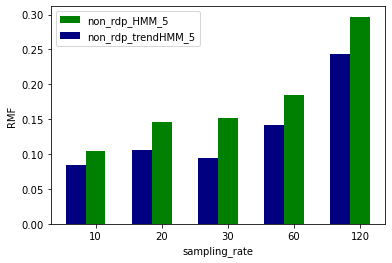

In [75]:
# rdp가 적용되지 않은 HMM과 trendHMM
x = np.arange(5)
plt.xlabel('sampling_rate')
plt.ylabel('RMF')
plt.bar(x, non_rdp_org_rmf_values, width = 0.3, label='HMM', color='green')
plt.bar(x-0.3, non_rdp_my_rmf_values, width = 0.3, label='trednHMM', color='navy')
plt.legend(["non_rdp_HMM_5", "non_rdp_trendHMM_5"])
plt.xticks(x, sampling_rate)

plt.show()

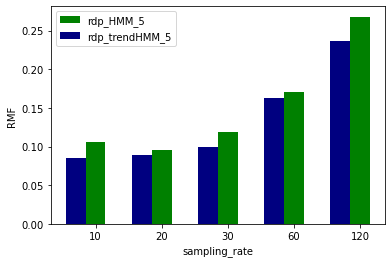

In [67]:
# rdp가 적용된 HMM과 trendHMM
x = np.arange(5)
plt.xlabel('sampling_rate')
plt.ylabel('RMF')
plt.bar(x, rdp_org_rmf_values, width = 0.3, label='HMM', color='green')
plt.bar(x-0.3, rdp_my_rmf_values, width = 0.3, label='trednHMM', color='navy')
plt.legend(["rdp_HMM_5", "rdp_trendHMM_5"])
plt.xticks(x, sampling_rate)

plt.show()

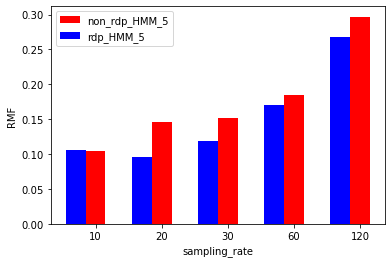

In [71]:
# rdp가 적용된 HMM과 아닌 HMM
x = np.arange(5)
plt.xlabel('sampling_rate')
plt.ylabel('RMF')
plt.bar(x, non_rdp_org_rmf_values, width = 0.3, label='non_rdp_HMM', color='red')
plt.bar(x-0.3, rdp_org_rmf_values, width = 0.3, label='rdp_HMM', color='blue')
plt.legend(["non_rdp_HMM_5", "rdp_HMM_5"])
plt.xticks(x, sampling_rate)

plt.show()

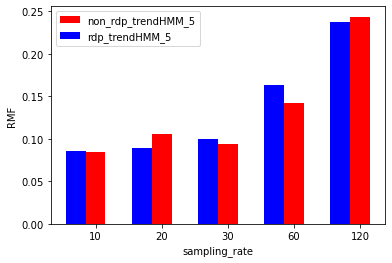

In [74]:
# rdp가 적용된 trendHMM과 아닌 trendHMM
x = np.arange(5)
plt.xlabel('sampling_rate')
plt.ylabel('RMF')
plt.bar(x, non_rdp_my_rmf_values, width = 0.3, label='non_rdp_trendHMM', color='red')
plt.bar(x-0.3, rdp_my_rmf_values, width = 0.3, label='rdp_trendHMM', color='blue')
plt.legend(["non_rdp_trendHMM_5", "rdp_trendHMM_5"])
plt.xticks(x, sampling_rate)

plt.show()

In [2]:
# 윗부분은 window size = 5 고정.
# 이번에는 모든 window size로 비교.

In [7]:
import pickle
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [8]:
def get_result_data(window_size): # 특정한 하나의 window_size에 대한 결과 데이터 반환
    with open(f"rdp_result\\result_my_{window_size}.pickle",'rb') as f: 
        rdp_my_data = pickle.load(f) # trendHMM

    with open(f"rdp_result\\result_org_{window_size}.pickle",'rb') as f:
        rdp_org_data = pickle.load(f) # HMM

    with open(f"non_rdp_result\\result_my_{window_size}.pickle",'rb') as f: 
        non_rdp_my_data = pickle.load(f) # trendHMM

    with open(f"non_rdp_result\\result_org_{window_size}.pickle",'rb') as f:
        non_rdp_org_data = pickle.load(f) # HMM
        
    return rdp_my_data, rdp_org_data, non_rdp_my_data, non_rdp_org_data # 4개의 리스트 반환


def get_rmf_value(window_size): # 특정한 하나의 window_size에 대한 (sampling_rate별) rmf 값 리스트 반환
    sampling_rate = [10, 20, 30, 60, 120]
    rdp_my_rmf_value = [0 for _ in range(len(sampling_rate))]
    rdp_org_rmf_value = [0 for _ in range(len(sampling_rate))]
    non_rdp_my_rmf_value = [0 for _ in range(len(sampling_rate))]
    non_rdp_org_rmf_value = [0 for _ in range(len(sampling_rate))]
    
    rdp_my_data, rdp_org_data, non_rdp_my_data, non_rdp_org_data = get_result_data(window_size)
    
    # 총 100개의 rmf 값을 다 더해서 평균을 낸다.
    
    for i in range(len(sampling_rate)):
        for j in range(len(rdp_my_data)):
                rdp_my_rmf_value[i] += rdp_my_data[j][i]
                rdp_org_rmf_value[i] += rdp_org_data[j][i]
                non_rdp_my_rmf_value[i] += non_rdp_my_data[j][i]
                non_rdp_org_rmf_value[i] += non_rdp_org_data[j][i]
                
        rdp_my_rmf_value[i] = rdp_my_rmf_value[i]/100
        rdp_org_rmf_value[i] = rdp_org_rmf_value[i]/100
        non_rdp_my_rmf_value[i] = non_rdp_my_rmf_value[i]/100
        non_rdp_org_rmf_value[i] = non_rdp_org_rmf_value[i]/100
        
    return rdp_my_rmf_value, rdp_org_rmf_value, non_rdp_my_rmf_value, non_rdp_org_rmf_value

def get_rmf_values(sampling_rate_list, window_size_list): # 각 윈도우 크기에 따른 각 샘플링 간격의 rmf값 리스트 반환. [window_size][sampling_rate]    
    rdp_my_rmf_values = [[] for _ in range(len(window_size_list))]
    rdp_org_rmf_values = [[] for _ in range(len(window_size_list))]
    non_rdp_my_rmf_values = [[] for _ in range(len(window_size_list))]
    non_rdp_org_rmf_values = [[] for _ in range(len(window_size_list))]
    
    # 해당 window_size행의 sampling_rate열에 따른 rmf값 리스트 찾기.
    for i in range(len(window_size_list)):
        window_size = window_size_list[i]
        # 해당 window_size행이 갖는 rmf 값 리스트.
        rdp_my_rmf_values[i], rdp_org_rmf_values[i], non_rdp_my_rmf_values[i], non_rdp_org_rmf_values[i] = get_rmf_value(window_size)
        
    return rdp_my_rmf_values, rdp_org_rmf_values, non_rdp_my_rmf_values, non_rdp_org_rmf_values



# 각 window_size의 sampling_rate별 rmf값 리스트 입력.
sampling_rate_list = [10, 20, 30, 60, 120]
window_size_list = [3, 4, 5, 6, 7, 8]
rdp_my_rmf_values, rdp_org_rmf_values, non_rdp_my_rmf_values, non_rdp_org_rmf_values = get_rmf_values(sampling_rate_list, window_size_list)

In [9]:
# 입력 결과 확인.
print(len(rdp_my_rmf_values)) # window_size의 개수
print(len(rdp_my_rmf_values[0])) # sampling_rate의 개수
print(rdp_my_rmf_values[0]) # window_size:3의 각 sampling_rate별 rmf값.

print()
for i in range(6):
    print(i+3, rdp_org_rmf_values[i])
    print(i+3, non_rdp_org_rmf_values[i])
    print()

6
5
[0.08306797017098011, 0.08804164510731396, 0.10016297384360504, 0.15496121169114827, 0.2426221986072441]

3 [0.10534099648972234, 0.095634065491973, 0.11887024556660722, 0.17067394497503474, 0.2677869023322076]
3 [0.10492818010356776, 0.14629488337302685, 0.15231899516505593, 0.18405843643746472, 0.29685079772135425]

4 [0.10534099648972234, 0.095634065491973, 0.11887024556660722, 0.17067394497503474, 0.2677869023322076]
4 [0.10492818010356776, 0.14629488337302685, 0.15231899516505593, 0.18405843643746472, 0.29685079772135425]

5 [0.10534099648972234, 0.095634065491973, 0.11887024556660722, 0.17067394497503474, 0.2677869023322076]
5 [0.10492818010356776, 0.14629488337302685, 0.15231899516505593, 0.18405843643746472, 0.29685079772135425]

6 [0.10534099648972234, 0.095634065491973, 0.11887024556660722, 0.17067394497503474, 0.2677869023322076]
6 [0.10492818010356776, 0.14629488337302685, 0.15231899516505593, 0.18405843643746472, 0.29685079772135425]

7 [0.10534099648972234, 0.09563406

In [10]:
# rdp 적용 전/후의 HMM/trendHMM 결과 비교.

In [11]:
# 그 전에 행렬을 transpose. 바꿔줘야 함. plt 코드가 각 sampling rate의 window size에 따른 그래프임. 즉, x축 y축 변환 필요.

rdp_my_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]
rdp_org_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]
non_rdp_my_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]
non_rdp_org_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]

for i in range(len(sampling_rate_list)):
    for j in range(len(window_size_list)):
        rdp_my_rmf_list[i][j] = rdp_my_rmf_values[j][i]
        rdp_org_rmf_list[i][j] = rdp_org_rmf_values[j][i]
        non_rdp_my_rmf_list[i][j] = non_rdp_my_rmf_values[j][i]
        non_rdp_org_rmf_list[i][j] = non_rdp_org_rmf_values[j][i]

C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/2503467322.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/2503467322.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/2503467322.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/2503467322.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/2503467322.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])


[Text(-1.0, 0, '3'),
 Text(0.0, 0, '3'),
 Text(1.0, 0, '4'),
 Text(2.0, 0, '5'),
 Text(3.0, 0, '6'),
 Text(4.0, 0, '7'),
 Text(5.0, 0, '8'),
 Text(6.0, 0, '')]

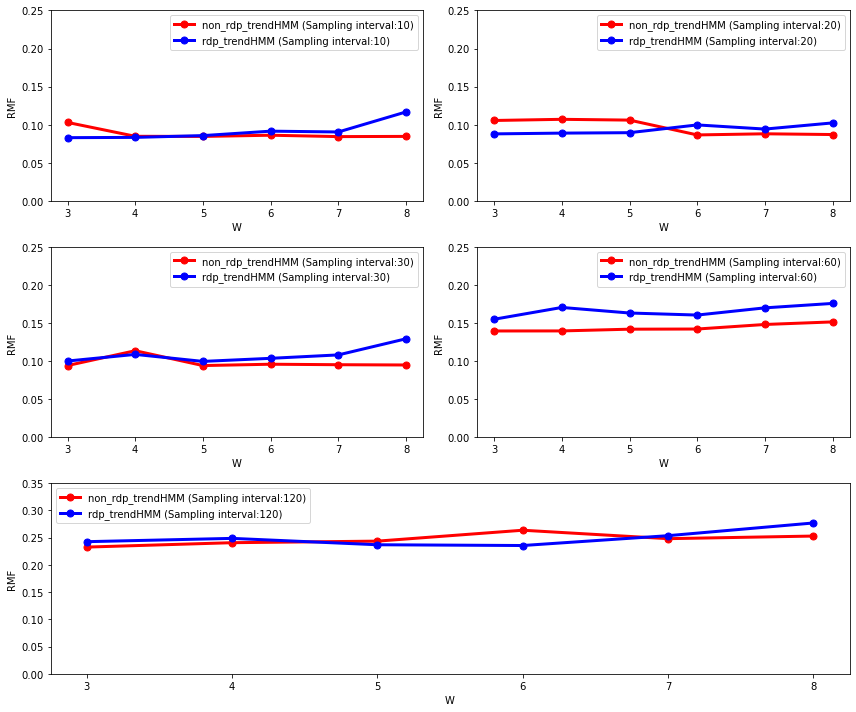

In [12]:
# 1. rdp 적용 전/후의 trendHMM의 결과.

fig = plt.figure(tight_layout= True,facecolor='white')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.rc('font',size=10)
gs = gridspec.GridSpec(3,2)

ax = fig.add_subplot(gs[0,0])
ax.plot(non_rdp_my_rmf_list[0],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.plot(rdp_my_rmf_list[0],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.legend(["non_rdp_trendHMM (Sampling interval:10)", "rdp_trendHMM (Sampling interval:10)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.

ax = fig.add_subplot(gs[0,1])
ax.plot(non_rdp_my_rmf_list[1],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.plot(rdp_my_rmf_list[1],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.legend(["non_rdp_trendHMM (Sampling interval:20)", "rdp_trendHMM (Sampling interval:20)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,0])
ax.plot(non_rdp_my_rmf_list[2],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.plot(rdp_my_rmf_list[2],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.legend(["non_rdp_trendHMM (Sampling interval:30)", "rdp_trendHMM (Sampling interval:30)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,1])
ax.plot(non_rdp_my_rmf_list[3],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.plot(rdp_my_rmf_list[3],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.legend(["non_rdp_trendHMM (Sampling interval:60)", "rdp_trendHMM (Sampling interval:60)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,:])
ax.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.plot(rdp_my_rmf_list[4],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.legend(["non_rdp_trendHMM (Sampling interval:120)", "rdp_trendHMM (Sampling interval:120)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels([3,3,4,5,6,7,8])


# plt.savefig('trendHMM_only.png')

C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/1762884359.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/1762884359.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/1762884359.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/1762884359.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/1762884359.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])


[Text(-1.0, 0, '3'),
 Text(0.0, 0, '3'),
 Text(1.0, 0, '4'),
 Text(2.0, 0, '5'),
 Text(3.0, 0, '6'),
 Text(4.0, 0, '7'),
 Text(5.0, 0, '8'),
 Text(6.0, 0, '')]

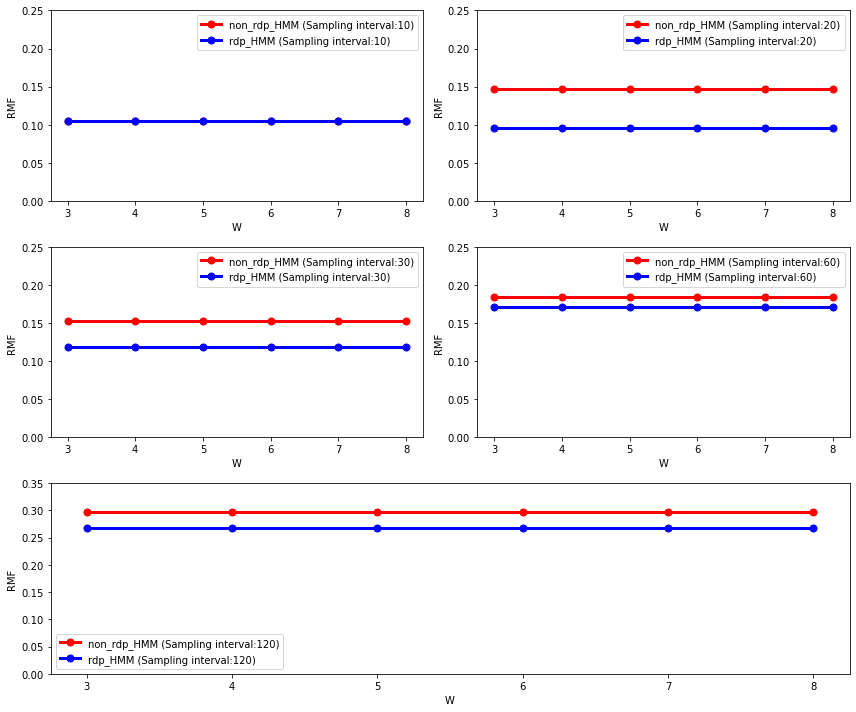

In [13]:
# 2. rdp 적용 전/후의 HMM의 결과.

fig = plt.figure(tight_layout= True,facecolor='white')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.rc('font',size=10)
gs = gridspec.GridSpec(3,2)

ax = fig.add_subplot(gs[0,0])
ax.plot(non_rdp_org_rmf_list[0],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.plot(rdp_org_rmf_list[0],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.legend(["non_rdp_HMM (Sampling interval:10)", "rdp_HMM (Sampling interval:10)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.

ax = fig.add_subplot(gs[0,1])
ax.plot(non_rdp_org_rmf_list[1],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.plot(rdp_org_rmf_list[1],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.legend(["non_rdp_HMM (Sampling interval:20)", "rdp_HMM (Sampling interval:20)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,0])
ax.plot(non_rdp_org_rmf_list[2],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.plot(rdp_org_rmf_list[2],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.legend(["non_rdp_HMM (Sampling interval:30)", "rdp_HMM (Sampling interval:30)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,1])
ax.plot(non_rdp_org_rmf_list[3],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.plot(rdp_org_rmf_list[3],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.legend(["non_rdp_HMM (Sampling interval:60)", "rdp_HMM (Sampling interval:60)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,:])
ax.plot(non_rdp_org_rmf_list[4],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.plot(rdp_org_rmf_list[4],color='blue',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.legend(["non_rdp_HMM (Sampling interval:120)", "rdp_HMM (Sampling interval:120)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels([3,3,4,5,6,7,8])


# plt.savefig('HMM_only.png')

C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/92381707.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/92381707.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/92381707.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/92381707.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/92381707.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])


[Text(-1.0, 0, '3'),
 Text(0.0, 0, '3'),
 Text(1.0, 0, '4'),
 Text(2.0, 0, '5'),
 Text(3.0, 0, '6'),
 Text(4.0, 0, '7'),
 Text(5.0, 0, '8'),
 Text(6.0, 0, '')]

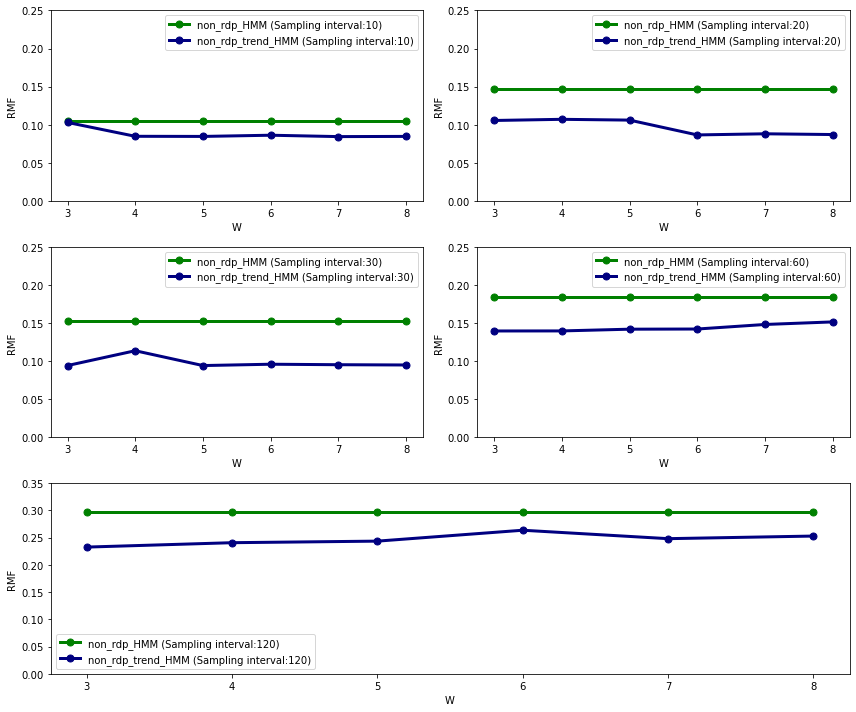

In [14]:
# 3. rdp 전용 전의 trendHMM/HMM의 결과.

fig = plt.figure(tight_layout= True,facecolor='white')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.rc('font',size=10)
gs = gridspec.GridSpec(3,2)

ax = fig.add_subplot(gs[0,0])
ax.plot(non_rdp_org_rmf_list[0],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.plot(non_rdp_my_rmf_list[0],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.legend(["non_rdp_HMM (Sampling interval:10)", "non_rdp_trend_HMM (Sampling interval:10)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.

ax = fig.add_subplot(gs[0,1])
ax.plot(non_rdp_org_rmf_list[1],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.plot(non_rdp_my_rmf_list[1],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.legend(["non_rdp_HMM (Sampling interval:20)", "non_rdp_trend_HMM (Sampling interval:20)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,0])
ax.plot(non_rdp_org_rmf_list[2],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.plot(non_rdp_my_rmf_list[2],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.legend(["non_rdp_HMM (Sampling interval:30)", "non_rdp_trend_HMM (Sampling interval:30)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,1])
ax.plot(non_rdp_org_rmf_list[3],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.plot(non_rdp_my_rmf_list[3],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.legend(["non_rdp_HMM (Sampling interval:60)", "non_rdp_trend_HMM (Sampling interval:60)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,:])
ax.plot(non_rdp_org_rmf_list[4],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.plot(non_rdp_my_rmf_list[4],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.legend(["non_rdp_HMM (Sampling interval:120)", "non_rdp_trend_HMM (Sampling interval:120)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels([3,3,4,5,6,7,8])


# plt.savefig('non_rdp_trendHMM_and_HMM.png')

C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/568272247.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/568272247.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/568272247.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/568272247.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_31908/568272247.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])


[Text(-1.0, 0, '3'),
 Text(0.0, 0, '3'),
 Text(1.0, 0, '4'),
 Text(2.0, 0, '5'),
 Text(3.0, 0, '6'),
 Text(4.0, 0, '7'),
 Text(5.0, 0, '8'),
 Text(6.0, 0, '')]

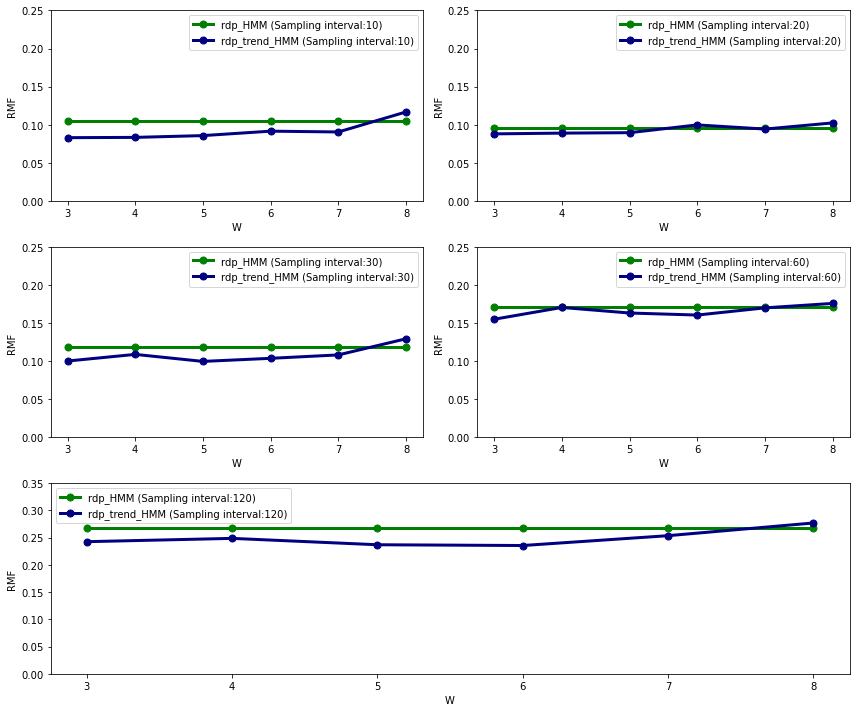

In [15]:
# 4. rdp 적용 후의 trendHMM/HMM의 결과.

fig = plt.figure(tight_layout= True,facecolor='white')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.rc('font',size=10)
gs = gridspec.GridSpec(3,2)

ax = fig.add_subplot(gs[0,0])
ax.plot(rdp_org_rmf_list[0],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.plot(rdp_my_rmf_list[0],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 10")
ax.legend(["rdp_HMM (Sampling interval:10)", "rdp_trend_HMM (Sampling interval:10)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.

ax = fig.add_subplot(gs[0,1])
ax.plot(rdp_org_rmf_list[1],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.plot(rdp_my_rmf_list[1],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 20")
ax.legend(["rdp_HMM (Sampling interval:20)", "rdp_trend_HMM (Sampling interval:20)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,0])
ax.plot(rdp_org_rmf_list[2],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.plot(rdp_my_rmf_list[2],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 30")
ax.legend(["rdp_HMM (Sampling interval:30)", "rdp_trend_HMM (Sampling interval:30)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,1])
ax.plot(rdp_org_rmf_list[3],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.plot(rdp_my_rmf_list[3],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 60")
ax.legend(["rdp_HMM (Sampling interval:60)", "rdp_trend_HMM (Sampling interval:60)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,:])
ax.plot(rdp_org_rmf_list[4],color='green',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.plot(rdp_my_rmf_list[4],color='navy',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
ax.legend(["rdp_HMM (Sampling interval:120)", "rdp_trend_HMM (Sampling interval:120)"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels([3,3,4,5,6,7,8])


# plt.savefig('with_rdp_trendHMM_and_HMM.png')

In [16]:
# 표로 만들기.
'''
각 sampling rate별로 

  non_rdp_trendHMM / non_rdp_HMM / trendHMM의 상대-%정도
3
4
5
6
7
8

  rdp_trendHMM / rdp_HMM / trendHMM의 상대-%정도
3
4
5
6
7
8

  rdp_trendHMM / non_rdp_trendHMM / rdp의 상대 -%정도
3
4
5
6
7
8

  rdp_HMM / non_rdp_HMM / rdp의 상대 -%정도
'''

[0.10492818010356776, 0.10492818010356776, 0.10492818010356776, 0.10492818010356776, 0.10492818010356776, 0.10492818010356776]


In [19]:
for i in range(len(sampling_rate_list)):
    print(sampling_rate_list[i])
    print('rdp_my_rmf_list:', rdp_my_rmf_list[i])
    print('rdp_org_rmf_list:', rdp_org_rmf_list[i])
    print('non_rdp_my_rmf_list:', non_rdp_my_rmf_list[i])
    print('non_rdp_org_rmf_list:', non_rdp_org_rmf_list[i])

10
rdp_my_rmf_list: [0.08306797017098011, 0.08344298461750162, 0.08578308137041796, 0.09160386738774799, 0.09054523921674106, 0.11684343351624961]
rdp_org_rmf_list: [0.10534099648972234, 0.10534099648972234, 0.10534099648972234, 0.10534099648972234, 0.10534099648972234, 0.10534099648972234]
non_rdp_my_rmf_list: [0.1030549267901229, 0.08486738621706875, 0.08469576445342163, 0.08627793943651127, 0.0844640372421511, 0.08473042526770666]
non_rdp_org_rmf_list: [0.10492818010356776, 0.10492818010356776, 0.10492818010356776, 0.10492818010356776, 0.10492818010356776, 0.10492818010356776]
20
rdp_my_rmf_list: [0.08804164510731396, 0.08903828634051057, 0.08960916827185843, 0.09978801750641819, 0.09434890893426978, 0.10244057314139292]
rdp_org_rmf_list: [0.095634065491973, 0.095634065491973, 0.095634065491973, 0.095634065491973, 0.095634065491973, 0.095634065491973]
non_rdp_my_rmf_list: [0.10561783520320377, 0.10713735098575108, 0.10610912275066538, 0.0866618500194085, 0.08815169224510785, 0.08717

In [24]:
import pandas as pd

for i in range(len(sampling_rate_list)):
    df = pd.DataFrame(rdp_my_rmf_list[i], columns = ['rdp_trendHMM_RMF'])
    df['non_rdp_trendHMM_RMF'] = non_rdp_my_rmf_list[i]
    df['rdp_HMM_RMF'] = rdp_org_rmf_list[i]
    df['non_rdp_HMM_RMF'] = non_rdp_org_rmf_list[i]

    sampling_rate = sampling_rate_list[i]
    df.to_csv("rmf"+{sampling_rate}+".csv", index = False)

TypeError: can only concatenate str (not "set") to str